# Breast Cancer Prediction

**Breast Cancer Prediction** is a classification task aimed at predicting the diagnosis of a breast mass as either malignant or benign. The dataset used for this prediction consists of features computed from a digitized image of a fine needle aspirate (FNA) of the breast mass. These features describe various characteristics of the cell nuclei present in the image.

The dataset contains the following information for each instance:

1. ID number: A unique identifier for each sample.
2. Diagnosis: The target variable indicating the diagnosis, where 'M' represents malignant and 'B' represents benign.

For each cell nucleus, ten real-valued features are computed, which are:

1. Radius: The mean distance from the center to points on the perimeter of the nucleus.
2. Texture: The standard deviation of gray-scale values in the nucleus.
3. Perimeter: The perimeter of the nucleus.
4. Area: The area of the nucleus.
5. Smoothness: A measure of local variation in radius lengths.
6. Compactness: Computed as the square of the perimeter divided by the area minus 1.0.
7. Concavity: Describes the severity of concave portions of the nucleus contour.
8. Concave points: Represents the number of concave portions of the nucleus contour.
9. Symmetry: Measures the symmetry of the nucleus.
10. Fractal dimension: This feature approximates the "coastline" of the nucleus, using the concept of fractal geometry.

These features provide quantitative measurements that can be used to assess the characteristics of cell nuclei and aid in distinguishing between malignant and benign breast masses. By training a machine learning model on this dataset, it is possible to develop a predictive model that can assist in the early detection and diagnosis of breast cancer.

In [26]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [27]:
#importing the dataset
df = pd.read_csv('Breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing Part 1

In [28]:
# dropping unnecessary columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [29]:
#checking for the missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [30]:
#checking the data types of the columns
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [31]:
# checking the data description
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



## Exploratory Data Analysis (EDA) – Advanced Plots

All plots below are generated **before train-test split** and use **diagnosis as the target variable**.


In [32]:

# Encode target variable
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [33]:
# coorelation between the columns diagnosis and the other columns
df.corr()['diagnosis_encoded'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [34]:
df.drop(['diagnosis_encoded'],axis=1,inplace=True)

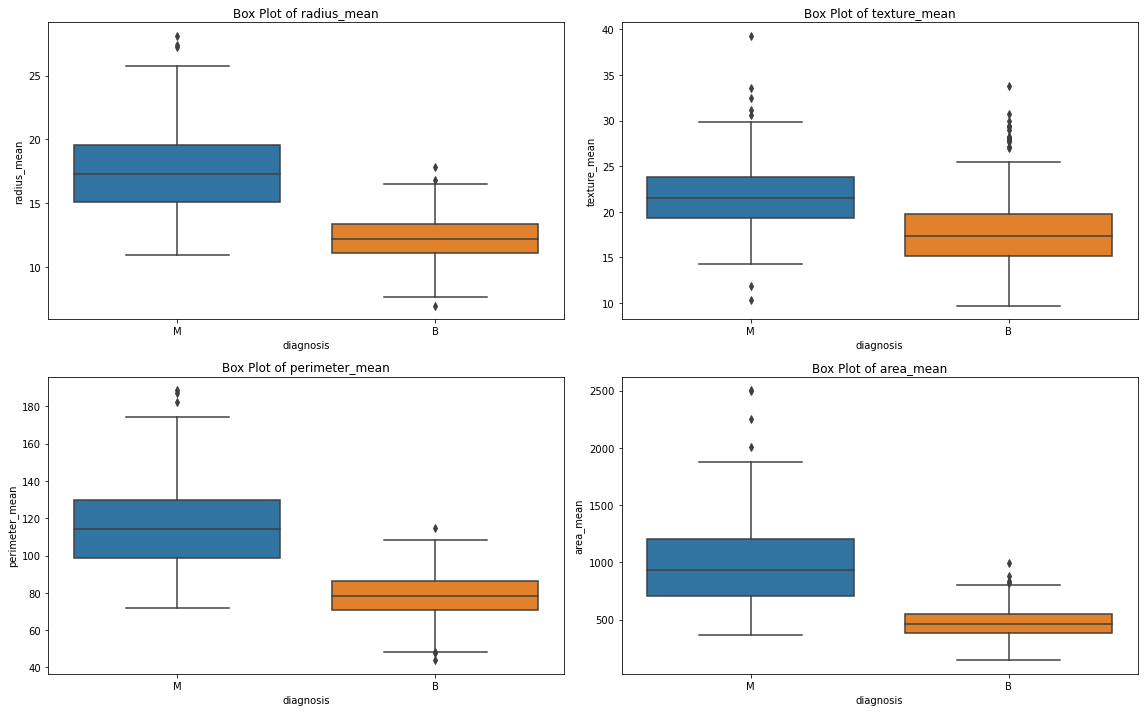

In [36]:

# Box Plots for multiple features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(16,10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


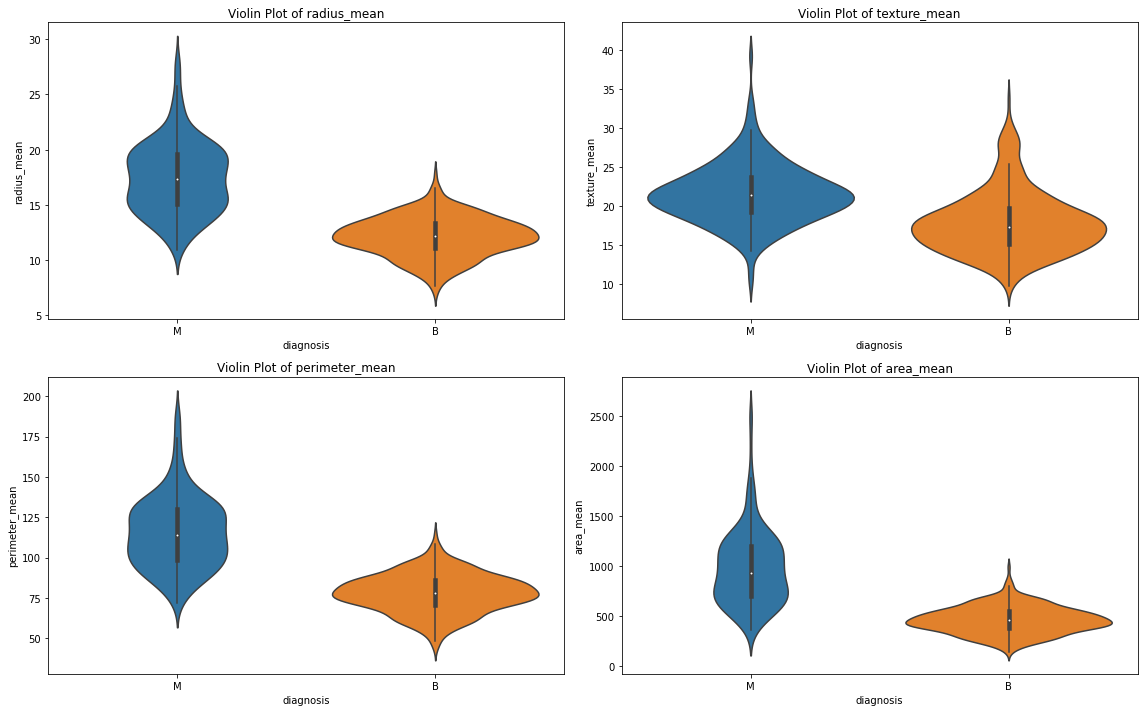

In [37]:
# Violin Plots
plt.figure(figsize=(16,10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='diagnosis', y=col, data=df)
    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()


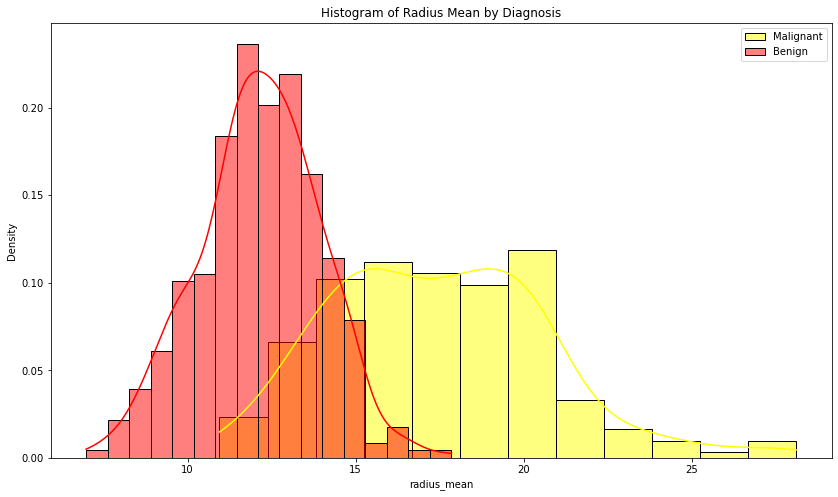

In [38]:

# Layered Histograms
plt.figure(figsize=(14,8))

sns.histplot(df[df['diagnosis']=='M']['radius_mean'], kde=True, label='Malignant', stat='density',color='yellow')
sns.histplot(df[df['diagnosis']=='B']['radius_mean'], kde=True, label='Benign', stat='density',color='red')

plt.legend()
plt.title('Histogram of Radius Mean by Diagnosis')
plt.show()


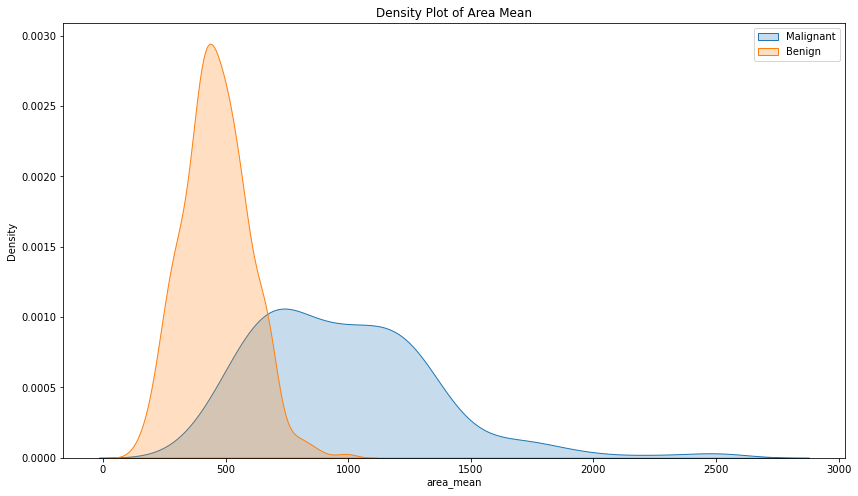

In [39]:

# Density (KDE) Plots for multiple variables
plt.figure(figsize=(14,8))

sns.kdeplot(df[df['diagnosis']=='M']['area_mean'], label='Malignant', fill=True)
sns.kdeplot(df[df['diagnosis']=='B']['area_mean'], label='Benign', fill=True)

plt.legend()
plt.title('Density Plot of Area Mean')
plt.show()


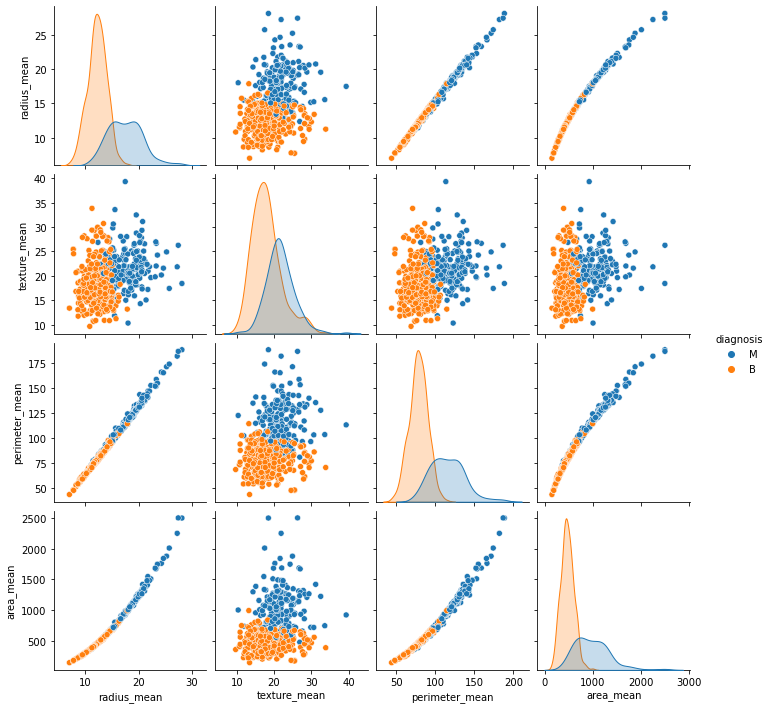

In [40]:

# Pair Plot (selected features)
pair_features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'diagnosis'
]

sns.pairplot(df[pair_features], hue='diagnosis')
plt.show()


<AxesSubplot:>

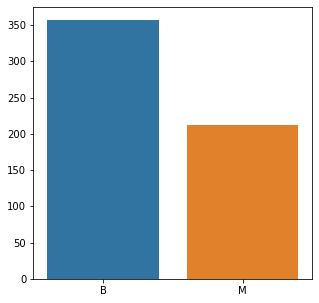

In [41]:
# bar plot for the number of diagnosis
plt.figure(figsize=(5,5))
sns.barplot(x=df['diagnosis'].value_counts().index,y=df['diagnosis'].value_counts().values)


<AxesSubplot:>

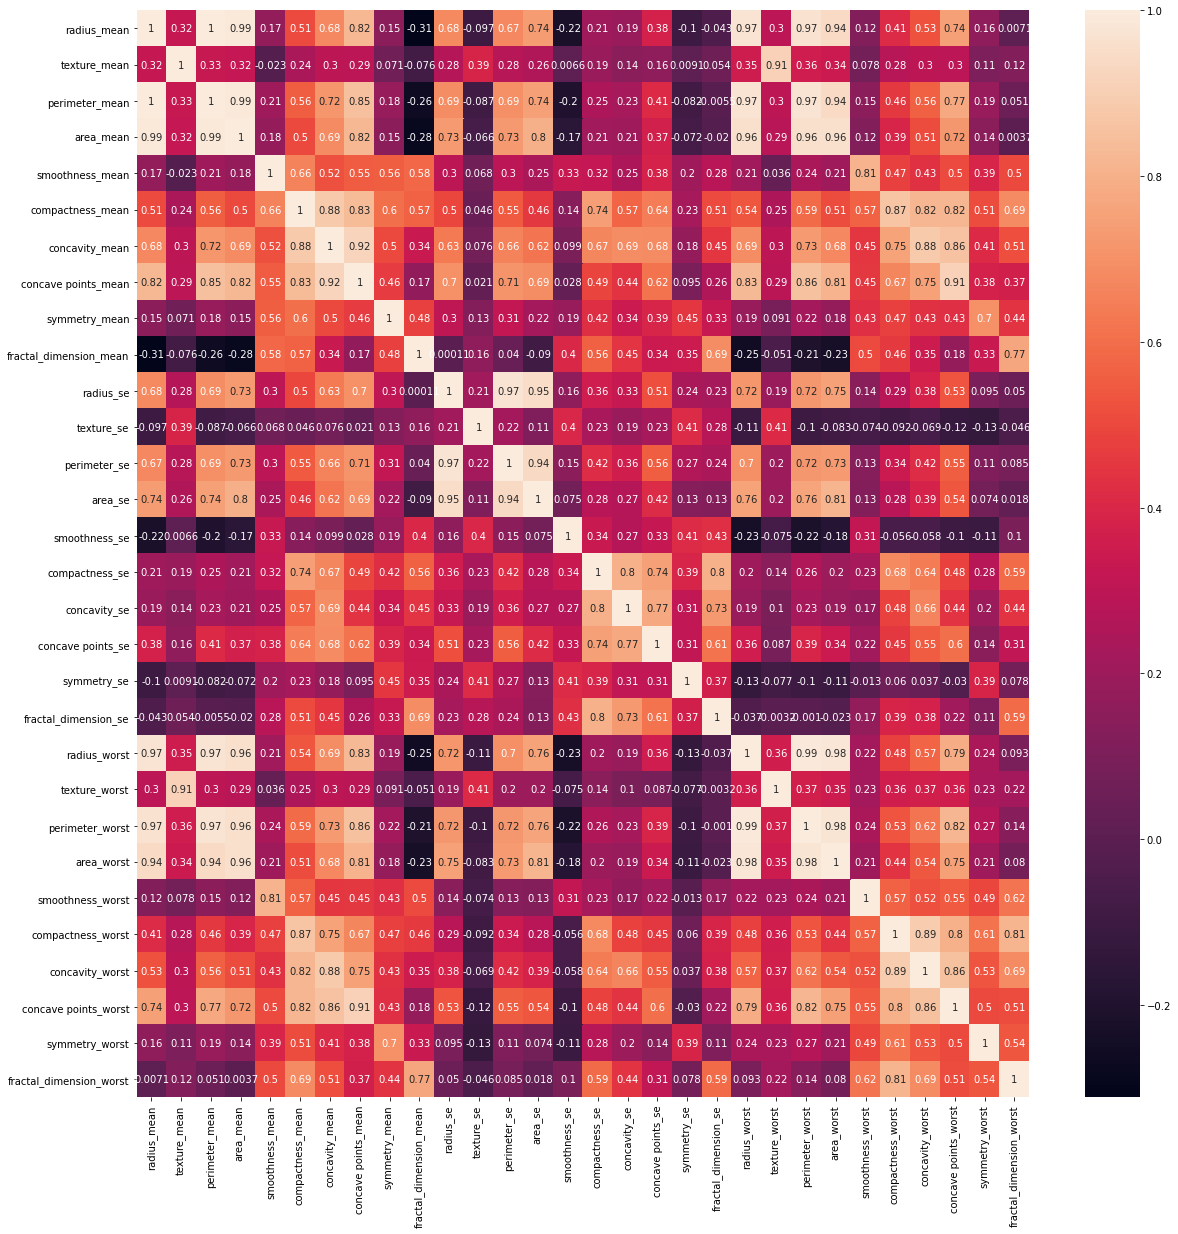

In [42]:
# create a heatmap to check the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['diagnosis'],axis=1),df['diagnosis'],test_size=0.3,random_state=42)

## Using Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
X_train.dtypes.value_counts()

float64    30
dtype: int64

In [46]:
X_train.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953
261,17.35,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,...,19.85,31.47,128.20,1218.0,0.12400,0.1486,0.1211,0.08235,0.2452,0.06515
227,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,16.41,19.31,114.20,808.2,0.11360,0.3627,0.3402,0.13790,0.2954,0.08362
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,13.45,24.49,86.00,562.0,0.12440,0.1726,0.1449,0.05356,0.2779,0.08121
453,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.13470,0.1478,0.1373,0.10690,0.2606,0.07810
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,15.11,25.63,99.43,701.9,0.14250,0.2566,0.1935,0.12840,0.2849,0.09031


In [47]:
#predicting the diagnosis
y_pred = dtree.predict(X_test)

## Model Evaluation

In [48]:
# printing samples from predicted and actual values
print('Predicted values: ',y_pred[:10])
print('Actual values: ',y_test[:10])

Predicted values:  ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B']
Actual values:  204    B
70     M
131    M
431    B
540    B
567    M
369    M
29     M
81     B
477    B
Name: diagnosis, dtype: object


In [49]:
# model evaluation 
print(dtree.score(X_test,y_test))


0.935672514619883


## Using logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ANIKET\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
yhat = logmodel.predict(X_test)

## Model Evaluation

In [52]:
# printing samples from predicted and actual values
print('Predicted values: ',yhat[:10])
print('Actual values: ',y_test[:10])

Predicted values:  ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']
Actual values:  204    B
70     M
131    M
431    B
540    B
567    M
369    M
29     M
81     B
477    B
Name: diagnosis, dtype: object


In [53]:
# model evaluation
print(logmodel.score(X_test,y_test))

0.9707602339181286



# Naive Bayes Classifier

In [55]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9415204678362573
              precision    recall  f1-score   support

           B       0.95      0.96      0.95       108
           M       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Support Vector Machine (SVM)

In [56]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.935672514619883
              precision    recall  f1-score   support

           B       0.91      1.00      0.95       108
           M       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



## K-Nearest Neighbors (KNN)

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           B       0.95      0.99      0.97       108
           M       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# conclusion

Among all evaluated models, K-Nearest Neighbors (KNN) achieved the highest accuracy (95.9%) on the test dataset.
Due to the dataset’s well-separated numerical features and proper scaling, KNN effectively captured local decision boundaries.
Given the medical context, further emphasis was placed on recall and F1-score, making KNN a reliable choice for breast cancer prediction.